<a href="https://colab.research.google.com/github/cmagliano/Proj/blob/main/Transfer_Learning_Inceptionv3__(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2024-06-29 20:36:25--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.207, 108.177.98.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

inception_v3_weight 100%[===================>]  83.84M  54.3MB/s    in 1.5s    

2024-06-29 20:36:27 (54.3 MB/s) - ‘inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [16]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [18]:
weights1="inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

In [19]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                include_top = False,
                                weights = None)

pre_trained_model.load_weights(weights1)

for layer in pre_trained_model.layers:
    layer.trainable = False

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 74, 74, 32)           864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 74, 74, 32)           96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 74, 74, 32)           0         ['batch_normalizati

In [20]:
last_layer = pre_trained_model.get_layer('mixed10')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 3, 3, 2048)


In [21]:
from tensorflow.keras.optimizers import Adam

x = layers.Flatten()(last_output)

x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense  (1, activation='sigmoid')(x)

model = Model( pre_trained_model.input, x)

model.compile(optimizer = Adam(lr=0.0001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [30]:
from google.colab import drive
drive.mount('/content/drive')

import os
workdir_path = '/content/drive/My Drive/'  # Inserir o local da pasta onde estão os arquivos de entrada (treino e teste)
os.chdir(workdir_path)
os.listdir()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['Classroom',
 'Colab Notebooks',
 'ColabExercises',
 'BI Master',
 'Public',
 'aula 12 - Aplicações RAG',
 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5']

In [32]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory("aula 12 - Aplicações RAG/transfer learning/cats_and_dogs/dataset/training_set/",
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (150, 150))

validation_generator =  test_datagen.flow_from_directory( "aula 12 - Aplicações RAG/transfer learning/cats_and_dogs/dataset/test_set/",
                                                          batch_size  = 20,
                                                          class_mode  = 'binary',
                                                          target_size = (150, 150))

Found 401 images belonging to 2 classes.
Found 206 images belonging to 2 classes.


In [33]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 20,
            epochs = 10,
            validation_steps = 10,
            verbose = 1)

Epoch 1/10
20/20 [==============================] - 153s 7s/step - loss: 11.6006 - accuracy: 0.7559 - val_loss: 3.6929 - val_accuracy: 0.9000
Epoch 2/10
20/20 [==============================] - 5s 245ms/step - loss: 4.2717 - accuracy: 0.8898 - val_loss: 1.6280 - val_accuracy: 0.9500
Epoch 3/10
20/20 [==============================] - 5s 247ms/step - loss: 3.9001 - accuracy: 0.8793 - val_loss: 2.2361 - val_accuracy: 0.9250
Epoch 4/10
20/20 [==============================] - 6s 287ms/step - loss: 3.6480 - accuracy: 0.8898 - val_loss: 4.1619 - val_accuracy: 0.8950
Epoch 5/10
20/20 [==============================] - 5s 233ms/step - loss: 2.7603 - accuracy: 0.8950 - val_loss: 1.2568 - val_accuracy: 0.9550
Epoch 6/10
20/20 [==============================] - 5s 233ms/step - loss: 2.6150 - accuracy: 0.9003 - val_loss: 1.0624 - val_accuracy: 0.9550
Epoch 7/10
20/20 [==============================] - 5s 270ms/step - loss: 2.1175 - accuracy: 0.9265 - val_loss: 1.0869 - val_accuracy: 0.9500
Epoch 

<Figure size 640x480 with 0 Axes>

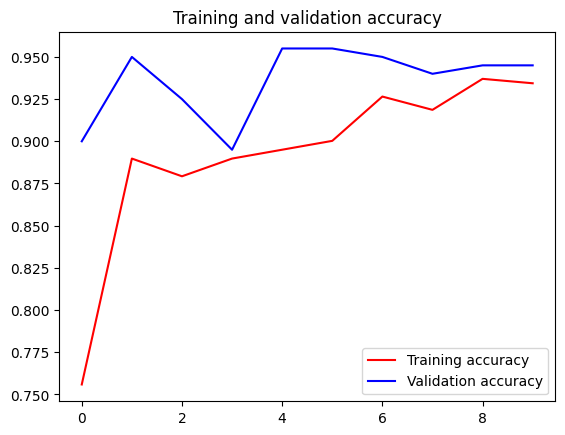

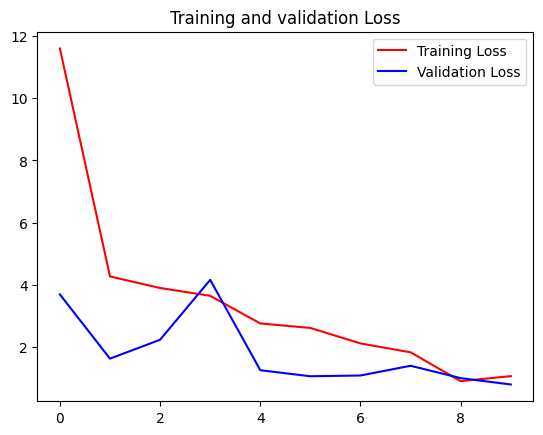

<Figure size 640x480 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

In [35]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
from  sklearn.metrics import classification_report, confusion_matrix

In [38]:
out_gen = validation_generator.__next__()
y_true = out_gen[1]
y_pred = model.predict(out_gen[0])
y_pred = (y_pred >= 0.5).astype('float32')
y_pred = [i[0] for i in y_pred]

1/1 [==============================] - 2s 2s/step


In [40]:
confusion_matrix(y_true, y_pred)

array([[10,  0],
       [ 1,  9]])